<a href="https://colab.research.google.com/github/Huin9/Huin9/blob/main/Ch02_01_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Overfitting and Regularization

- How to solve?
  - 더 많은 훈련 데이터 셋
  - Smaller set of features
    - 차원을 축소하는 방법, 딥러닝에서 배우는 AutoEncoder 또한 Dimension Reduction의 한 방법
    - 설명 변수가 많다면 오차는 줄어들겠지만 새로운 data를 적용시키기에는 쉽지 않다
  - Regularization(Add term to loss)
    - RIDGE
    - LASSO

## example

- Graph 상에 임의의 Dot을 찍어서 차수에 따른 그래프의 변화를 확인한다

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

- 1차원 그래프

In [4]:
X = np.arange(1,11).reshape(10,1)
y = np.array([7,8,7,13,16,15,19,23,18,21]).reshape(10,1)

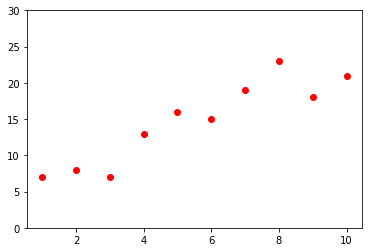

In [5]:
plt.plot(X, y, 'ro') # bo = blue + circle / use go(green circle)

axes = plt.gca()
axes.set_ylim([0,30])

plt.show()

## Perform LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(X,y)

print(reg.intercept_)
print(reg.coef_)

[4.93333333]
[[1.77575758]]


### 1차원 그래프

In [7]:
y_pred = reg.predict(X)

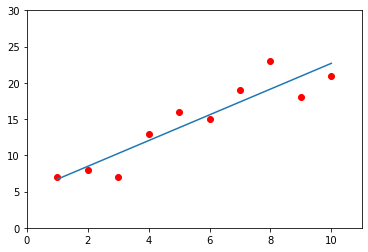

In [8]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

###  2차원 그래프

In [9]:
# np_c => 1차원 배열 두개를 col 방향으로 나열해서 concatenation(x^2)
X_2 = np.c_[X, X**2]
X_2

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [10]:
reg = LinearRegression()

reg.fit(X_2, y)

print(reg.intercept_)
print(reg.coef_)

[2.43333333]
[[ 3.02575758 -0.11363636]]


In [11]:
print(reg.coef_)

[[ 3.02575758 -0.11363636]]


- 그래프를 그려보자

In [12]:
y_pred_2 = reg.predict(X_2)

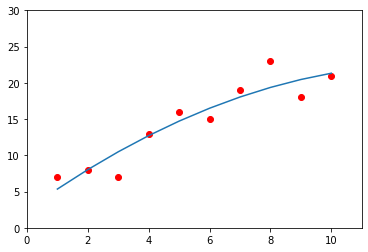

In [13]:
plt.plot(X, y, 'ro')
plt.plot(X_2[:,0], y_pred_2)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

###  3차원 그래프

In [14]:
# np_c => 1차원 배열 두개를 col 방향으로 나열해서 concatenation(x^2)
X_3 = np.c_[X, X**2, X**3]
X_3

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [15]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3, include_bias= False)
X_3_poly = polynomial.fit_transform(X)
X_3_poly

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [16]:
reg = LinearRegression()
reg.fit(X_3_poly, y)

w0 = reg.intercept_
w = reg.coef_

print(w)

print('w0:', w0)
print('w1:', w[0][0]) # <- x^1에 곱해지는 w1
print('w2:', w[0][1]) # <- x^2에 곱해지는 w2
print('w3:', w[0][2]) # <- x^3에 곱해지는 w3

[[-1.2020202   0.8030303  -0.05555556]]
w0: [7.2]
w1: -1.2020202020202135
w2: 0.8030303030303007
w3: -0.05555555555555525


- Q) x=2 일때의 y값은?

In [17]:
X_2 = np.array([2,4,8])
X_2

array([2, 4, 8])

In [18]:
w.reshape(-1,1)

array([[-1.2020202 ],
       [ 0.8030303 ],
       [-0.05555556]])

In [19]:
y_2 = X_2 @ w.reshape(-1,1) + w0
y_2

array([7.56363636])

- 혹은 단순하게 

In [20]:
print(w[0][2]*8 + w[0][1]*4 + w[0][0]*2 + w0)

[7.56363636]


- w와 intercept 값을 이용해서 그래프를새로 그려보자

In [21]:
y_pred_3 = reg.predict(X_3_poly)
y_pred_3

array([[ 6.74545455],
       [ 7.56363636],
       [ 9.32121212],
       [11.68484848],
       [14.32121212],
       [16.8969697 ],
       [19.07878788],
       [20.53333333],
       [20.92727273],
       [19.92727273]])

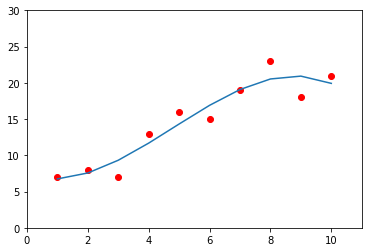

In [22]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred_3)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

- x 값의 범위를 좁게해서 그래프를 부드럽게

In [23]:
X_new = np.arange(-5, 15, 0.01).reshape(-1,1)

In [24]:
X_new

array([[-5.  ],
       [-4.99],
       [-4.98],
       ...,
       [14.97],
       [14.98],
       [14.99]])

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3, include_bias = False)
X_new_3 = polynomial.fit_transform(X_new)
X_new_3

array([[  -5.      ,   25.      , -125.      ],
       [  -4.99    ,   24.9001  , -124.251499],
       [  -4.98    ,   24.8004  , -123.505992],
       ...,
       [  14.97    ,  224.1009  , 3354.790473],
       [  14.98    ,  224.4004  , 3361.517992],
       [  14.99    ,  224.7001  , 3368.254499]])

In [26]:
y_pred_3 = (X_new_3 @ w.reshape(-1,1)) + w0
y_pred_3

array([[ 40.23030303],
       [ 40.09647671],
       [ 39.96297733],
       ...,
       [-17.21167729],
       [-17.35694097],
       [-17.50254338]])

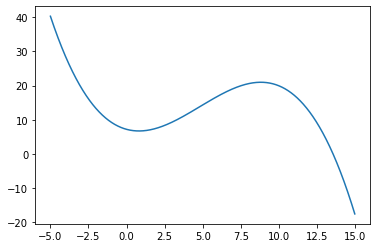

In [27]:
plt.plot(X_new, y_pred_3)

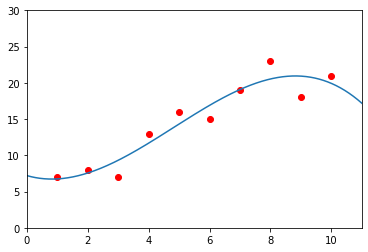

In [28]:
plt.plot(X, y, 'ro')
plt.plot(X_new, y_pred_3)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

### 7차원 그래프

In [29]:
polynomial = PolynomialFeatures(degree=7, include_bias=False)
X_7_poly = polynomial.fit_transform(X)
X_7_poly

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00],
       [2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01,
        3.200000e+01, 6.400000e+01, 1.280000e+02],
       [3.000000e+00, 9.000000e+00, 2.700000e+01, 8.100000e+01,
        2.430000e+02, 7.290000e+02, 2.187000e+03],
       [4.000000e+00, 1.600000e+01, 6.400000e+01, 2.560000e+02,
        1.024000e+03, 4.096000e+03, 1.638400e+04],
       [5.000000e+00, 2.500000e+01, 1.250000e+02, 6.250000e+02,
        3.125000e+03, 1.562500e+04, 7.812500e+04],
       [6.000000e+00, 3.600000e+01, 2.160000e+02, 1.296000e+03,
        7.776000e+03, 4.665600e+04, 2.799360e+05],
       [7.000000e+00, 4.900000e+01, 3.430000e+02, 2.401000e+03,
        1.680700e+04, 1.176490e+05, 8.235430e+05],
       [8.000000e+00, 6.400000e+01, 5.120000e+02, 4.096000e+03,
        3.276800e+04, 2.621440e+05, 2.097152e+06],
       [9.000000e+00, 8.100000e+01, 7.290000e+02, 6.561000e+03,
        5.904900

In [30]:
reg = LinearRegression()
reg.fit(X_7_poly, y)

w = reg.coef_
w0 = reg.intercept_
print(w)
print(w0)

[[ 2.78539902e+02 -2.37257520e+02  9.94563697e+01 -2.25924743e+01
   2.83667485e+00 -1.84910131e-01  4.87861813e-03]]
[-113.80000047]


In [31]:
print(w, '\n')

print('w0:', w0[0])
print('w1:', w[0][0]) # <- x^1에 곱해지는 w1
print('w2:', w[0][1]) # <- x^2에 곱해지는 w2
print('w3:', w[0][2]) # <- x^3에 곱해지는 w3
print('w1:', w[0][3]) # <- x^4에 곱해지는 w4
print('w2:', w[0][4]) # <- x^5에 곱해지는 w5
print('w3:', w[0][5]) # <- x^6에 곱해지는 w6
print('w3:', w[0][6]) # <- x^6에 곱해지는 w7

[[ 2.78539902e+02 -2.37257520e+02  9.94563697e+01 -2.25924743e+01
   2.83667485e+00 -1.84910131e-01  4.87861813e-03]] 

w0: -113.80000046732475
w1: 278.5399021806267
w2: -237.25751981363024
w3: 99.45636974024056
w1: -22.592474308015067
w2: 2.8366748460611313
w3: -0.18491013134342538
w3: 0.004878618130533141


In [32]:
y_pred_7 = reg.predict(X_7_poly)
y_pred_7

array([[ 7.00292066],
       [ 7.98490342],
       [ 7.01563148],
       [13.0679556 ],
       [15.74142326],
       [15.41522003],
       [18.61875769],
       [23.2081448 ],
       [17.93677496],
       [21.00826808]])

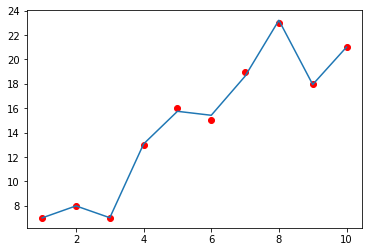

In [33]:
plt.plot(X, y, 'ro')
plt.plot(X_7_poly[:,0], y_pred_7)

In [34]:
X_new = np.arange(-5, 15, 0.01).reshape(-1,1)
polynomial = PolynomialFeatures(degree=7, include_bias = False)
X_new_7 = polynomial.fit_transform(X_new)
X_new_7

array([[-5.00000000e+00,  2.50000000e+01, -1.25000000e+02, ...,
        -3.12500000e+03,  1.56250000e+04, -7.81250000e+04],
       [-4.99000000e+00,  2.49001000e+01, -1.24251499e+02, ...,
        -3.09387475e+03,  1.54384350e+04, -7.70377907e+04],
       [-4.98000000e+00,  2.48004000e+01, -1.23505992e+02, ...,
        -3.06299800e+03,  1.52537301e+04, -7.59635757e+04],
       ...,
       [ 1.49700000e+01,  2.24100900e+02,  3.35479047e+03, ...,
         7.51811564e+05,  1.12546191e+07,  1.68481648e+08],
       [ 1.49800000e+01,  2.24400400e+02,  3.36151799e+03, ...,
         7.54325982e+05,  1.12998032e+07,  1.69271052e+08],
       [ 1.49900000e+01,  2.24700100e+02,  3.36825450e+03, ...,
         7.56847123e+05,  1.13451384e+07,  1.70063624e+08]])

In [35]:
reg.intercept_

array([-113.80000047])

In [36]:
y_pred_7 = (X_new_7 @ reg.coef_.reshape(-1,1)) + reg.intercept_
y_pred_7

array([[-46125.25190438],
       [-45783.60330071],
       [-45444.0872479 ],
       ...,
       [ 23429.60498549],
       [ 23624.45561806],
       [ 23820.66260959]])

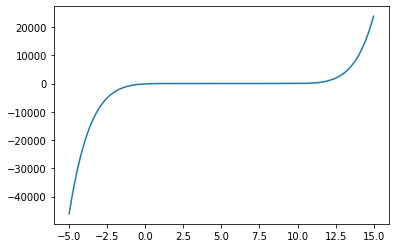

In [37]:
plt.plot(X_new, y_pred_7)

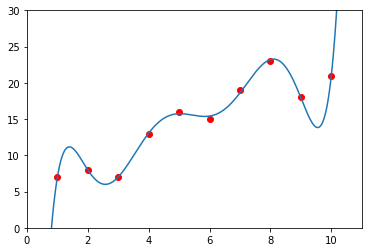

In [38]:
plt.plot(X, y, 'ro')
plt.plot(X_new, y_pred_7)

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30])
plt.show()

## Overfitting 방지

### RIDGE method

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge(alpha=1.0) # = 람다
ridge.fit(X_7_poly, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
y_pred_ridge = ridge.predict(X_7_poly)
y_pred_ridge

array([[ 6.58539548],
       [ 7.67540508],
       [ 9.40488209],
       [11.4819662 ],
       [14.06923745],
       [17.16324835],
       [19.90309737],
       [20.71792191],
       [19.22318841],
       [20.77565765]])

In [50]:
w0 = ridge.intercept_
w = ridge.coef_

print(w, '\n')

print('w0:', w0[0])
print('w1:', w[0][0]) # <- x^1에 곱해지는 w1
print('w2:', w[0][1]) # <- x^2에 곱해지는 w2
print('w3:', w[0][2]) # <- x^3에 곱해지는 w3
print('w1:', w[0][3]) # <- x^4에 곱해지는 w4
print('w2:', w[0][4]) # <- x^5에 곱해지는 w5
print('w3:', w[0][5]) # <- x^6에 곱해지는 w6
print('w3:', w[0][6]) # <- x^6에 곱해지는 w7

[[-2.34723213e-01 -9.30910788e-02  6.16961612e-01 -2.74594733e-01
   5.50301417e-02 -5.15343046e-03  1.80531321e-04]] 

w0: 6.5207856522803205
w1: -0.23472321256704515
w2: -0.09309107877150614
w3: 0.6169616124214852
w1: -0.2745947331741506
w2: 0.055030141728562056
w3: -0.005153430456323159
w3: 0.00018053132147908478


In [51]:
# coef_.reshape를 알아볼 수 있게 다시 표현
print(["{:0.3f}".format(x) for x in w.reshape(-1,)])

['-0.235', '-0.093', '0.617', '-0.275', '0.055', '-0.005', '0.000']


### 그래프를 다시 그려보자

In [52]:
# 그래프가 부드러운 모양이 되도록  X_new_7 을 이용
y_pred_ridge = ridge.predict(X_new_7)

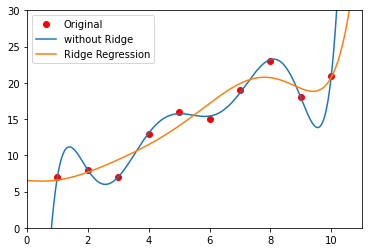

In [55]:
plt.plot(X, y,'ro')
plt.plot(X_new, y_pred_7)
plt.plot(X_new, y_pred_ridge)

plt.legend(['Original', 'without Ridge', 'Ridge Regression'])

# gca = 그래프의 '축'을 설정
axes = plt.gca()
axes.set_xlim([0,11])
axes.set_ylim([0,30]) #gca를 이용해 y의 범위를 0~30으로 늘려준다
plt.show()